# Day 2 of ATHENS November 2024 week
# Free Vibration of a Beam 

In [18]:
using LinearAlgebra
using DifferentialEquations
using Plots 

## Section 1: Introduction  

We denote the deflection of the beam at location $x$ (where $0 \leq x \leq 1$) and time $t$ (where $0 \leq t \leq T$) as $u(x,t)$. We solve the wave equation without external forcing for $u(x,t)$  

$$
\frac{\partial^2 u}{\partial t^2} = \frac{\partial^2 u}{\partial x^2}  \text{ for } 
0 \leq x \leq 1 \text{ and } 0 \leq t \leq T \, . 
$$

We use as boundary conditions (imposed at the left and right end point of the beam for all time) and initial conditions (imposed for initial position and initial velocity) such that the function 

$$
u(x,t) = \sin(\pi*x + c*\pi*t)
$$

is an analytical reference solution for our numerical computation (please observe the factor $\pi$ and the $+$ sign (this travelling wave travelling from left to right)).  

The initial position $u_0(x)$ and initial velocity $v_0(x)$ are given by $u_0(x) = \sin(\pi*x)$ and $v_0(x) = (c*\pi)\cos(\pi*x)$, respectively. 

Exercise: 
1. verify using pen and paper that $u(x,t)$ is indeed a solution; 
1. find other solutions 

## Section 2: Setting of Constants - Plotting the Analytical Reference Solution 

Set numerical and physical constants 

In [372]:
# set spacing in x
N = 100; h = 1/N; h2 = h*h; 
# xset spacing in t 
Tend = 3; M = 100; dt = Tend/M 
# set velocity 
c = 2; 

Set spacing in x and t domain (observe the use of comprehension). 

In [373]:
x = [(i-1)*h for i = 1:N+1]
t = [(j-1)*dt for j = 1:M];

Plot the analytical solution 

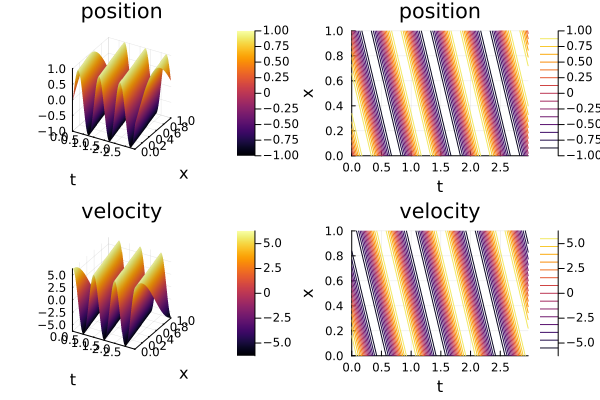

In [374]:
uanal = [sin(pi*xi+c*pi*tj) for xi in x, tj in t]
vanal = [(c*pi)*cos(pi*xi+c*pi*tj) for xi in x, tj in t]
p1 = surface(t,x,uanal, xlabel="t", ylabel="x", title="position")
p2 = contour(t,x,uanal, xlabel="t", ylabel="x", title="position")
p3 = surface(t,x,vanal, xlabel="t", ylabel="x", title="velocity")
p4 = contour(t,x,vanal, xlabel="t", ylabel="x", title="velocity")
plot(p1,p2,p3,p4, layout = (2,2) )

Plot same information differently 

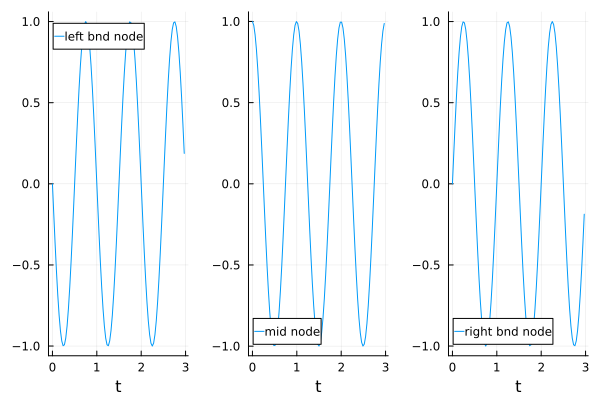

In [285]:
p1 = plot(t,uanal[1,:],xlabel="t", label="pos. left bnd node")
p2 = plot(t,uanal[div(N,2),:],xlabel="t", label="pos. mid node")
p3 = plot(t,uanal[end,:],xlabel="t", label="pos.  right bnd node")
plot(p1,p2,p3,layout=(1,3))

## Section 3: Discretization in space ($x$)

Observe that we here choose to work with a matrix $A$ in which the boundary nodes have been eliminated. The matrix is thus of size $N-1$-by-$N-1$.  

In [375]:
function build_matrix(N)
    h = 1/N # mesh width
    f = zeros(N-1) # right-hand side vector 
    e = ones(N-1) # diagonal vector 
    A = Tridiagonal(e[1:end-1], -2*e, e[1:end-1]) # for th interior nodes
    A = 1/(h*h)*A 
    return A,f 
end 

build_matrix (generic function with 1 method)

In [376]:
A,f = build_matrix(N);

In [377]:
#display(A)

In [378]:
#display(f)

## Section 4: Discretization in time ($t$)

### Define the Right-Hand Side Function  

In [379]:
function wave_system!(ddu,du,u,p,t)
    f[1]   = (-1/h2)*sin(-pi*c*t)   # left boundary node contribution 
    f[end] = (-1/h2)*sin(pi-c*pi*t) # right boundary node contribution
    ddu .= c^2*A*u .+ c^2*f         # internal nodes 
end

wave_system! (generic function with 2 methods)

### Solve the ODE problem 

In [380]:
# set initial position in internal nodes
u0 = [ sin(pi*xi) for xi in x[2:end-1]] 

# set initial velocity in internal nodes
v0 = [ (pi*c)*cos(pi*xi) for xi in x[2:end-1]]

# set time interval with start time andf end time 
tspan = (0.0, Tend)    

# set problem definition
prob = SecondOrderODEProblem(wave_system!,v0,u0,tspan)  

# solve problem 
sol = solve(prob,AutoVern7(Rodas5()), reltol = 1e-8, abstol = 1e-8); 

### Plot the Computed Solution  

Plot the initial conditions (intended here as verification). 

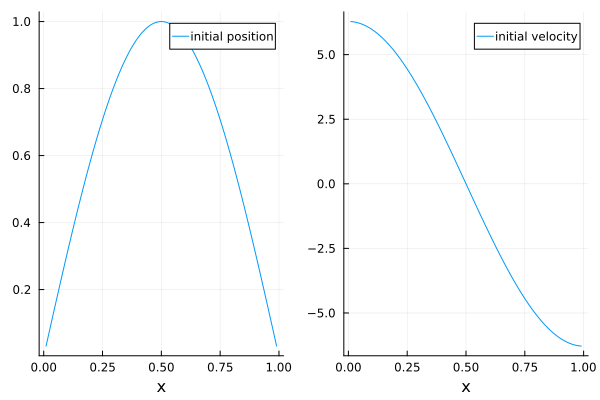

In [363]:
p1 = plot(x[2:end-1], u0, xlabel="x", label="initial position")
p2 = plot(x[2:end-1], v0, xlabel="x", label="initial velocity")
plot(p1,p2,layout=(1,2))

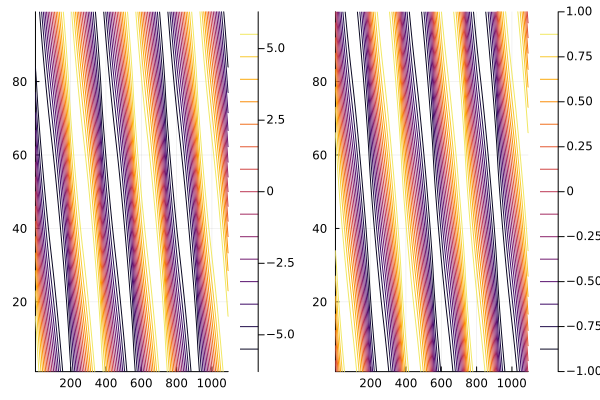

In [364]:
velind = 1:N-1; posind = N:2*N-2; 
Nt = length(sol.t)
V  = sol[velind,:]
p1 = contour(V)
U  = sol[posind,:]
p2 = contour(U)
plot(p1, p2, layout= (1,2))

## Section 5: Exercises 
1. investigate difference between analytical and numerical solution as spatial mesh width ($h$) and timew step ($dt$) are reduced;
1. introduce other analutical reference solutions; 
1. introduce external forcing by adding a term in the line that defines ddu in the function wave_system!(); 
1. introduce damping by adding again a term in the line that defines ddu in the function wave_system!();
1. introduce bar with inhomogeneous material distribution;
1. introduce a so-called implicit-explicit (IMEX) scheme to perform time integration;  